GRIB

https://docs.xarray.dev/en/stable/examples/ERA5-GRIB-example.html

This notebook is intended for downloading ERA5-Land data

Kernel: era5_env

In [2]:
import cdsapi
import numpy as np
import xarray as xr
import matplotlib.pyplot as plt
import ecmwflibs
import cfgrib
import cartopy.crs as ccrs
import cartopy.feature as cfeature
from datetime import datetime
import cartopy

In [39]:
path = r'C:\Users\trygg\Documents\Master_project\Data\ERA5\Temp'
name = 'ERA5-land_snow_depth_2023_01-03_1-10'
path_name = path + '\\' + name + '.grib'

In [ ]:
#download ERA5 data using cdsapi
c = cdsapi.Client()
path = r'C:\Users\trygg\Documents\Master_project\Data\ERA5\Temp'
name = 'ERA5-land_snow_depth_2023_01-03_1-10_deleteme'
path_name = path + '\\' + name + '.grib'
area_box = [70, 10,54,25]
# area_box = [67, -25, 63,-13,]
# month_list = ['01', '02', '03', '04']
month_list = ['01', '02', '03']
day_list = ['01', '02', '03', '04', '05', '06', '07', '08', '09', '10']
c.retrieve(
    'reanalysis-era5-land',
    {
        'variable': 'snow_depth',
        'year': '2023',
        'month': month_list,
        'day': day_list,
        'time': '05:00',
        'format': 'grib',
        'area': area_box,
    },
    path_name)
print('done')
print(path_name)

In [5]:
#iceland
c = cdsapi.Client()
path = r'C:\Users\trygg\Documents\Master_project\Data\ERA5\Temp'
name = 'ERA5-land-iceland-2020-03_11_albedo_density_depth_depth_water_equivalent_melt_temperature'
path_name = path + '\\' + name + '.grib'
# area_box = [70, 10,54,25]
area_box = [67, -25, 63,-13]
# month_list = ['01', '02', '03', '04']
month_list = ['03']
day_list = ['11']
c.retrieve(
    'reanalysis-era5-land',
    {
        'year': '2020',
        'month': '03',
        'day': '11',
        'time': '18:00',
        'format': 'grib',
        'variable': [
            'snow_albedo', 'snow_density', 'snow_depth',
            'snow_depth_water_equivalent', 'snowmelt', 'temperature_of_snow_layer',
        ],
        'area': area_box,
    },
    path_name)
print('done')
print(path)
print(path_name)


2023-10-24 18:26:17,794 INFO Welcome to the CDS
2023-10-24 18:26:17,796 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-land
2023-10-24 18:26:17,974 INFO Request is queued
2023-10-24 18:26:20,656 INFO Request is running
2023-10-24 18:26:22,988 INFO Request is completed
2023-10-24 18:26:22,989 INFO Downloading https://download-0013-clone.copernicus-climate.eu/cache-compute-0013/cache/data4/adaptor.mars.internal-1698171979.7010846-23206-3-39f9e170-4efa-4cc4-919e-3a47a2c78df9.grib to C:\Users\trygg\Documents\Master_project\Data\ERA5\Temp\ERA5-land-iceland-2020-03_11_albedo_density_depth_depth_water_equivalent_melt_temperature.grib (31.9K)
2023-10-24 18:26:23,765 INFO Download rate 41.1K/s


done
C:\Users\trygg\Documents\Master_project\Data\ERA5\Temp
C:\Users\trygg\Documents\Master_project\Data\ERA5\Temp\ERA5-land-iceland-2020-03_11_albedo_density_depth_depth_water_equivalent_melt_temperature.grib


In [10]:
#converts to geotiff

from osgeo import gdal
grib_file_path = r"C:\Users\trygg\Documents\Master_project\Data\ERA5\Download\adaptor.mars.internal-1695154817.1652327-16582-4-71f507b7-5144-40e5-9fc6-1a10634922e9.grib"


# Open existing dataset
src_ds = gdal.Open(grib_file_path)

# Ensure number of bands in GeoTiff will be same as in GRIB file. 
bands = [] # Set up array for gdal.Translate(). 
if src_ds is not None:
    bandNum = src_ds.RasterCount # Get band count
for i in range(bandNum+1): # Update array based on band count
    if (i==0): #gdal starts band counts at 1, not 0 like the Python for loop does.
        pass
    else:
        bands.append(i)

# Open output format driver
out_form= "GTiff"
tif_output_path = r"C:\Users\trygg\Documents\Master_project\Data\ERA5\TIF\\"
filename = "swerige_eri5_tif_testing_v1"
dst_filename = tif_output_path + filename + ".tif"
# Output to new format using gdal.Translate. See https://gdal.org/python/ for osgeo.gdal.Translate options.
dst_ds = gdal.Translate(dst_filename, src_ds, format=out_form, bandList=bands)

# Properly close the datasets to flush to disk
dst_ds = None
src_ds = None

In [ ]:
#iceland Snowdepths
#1
# name = 'ERA5-land-iceland-2021-03_17'
# name = 'ERA5-land-iceland-2021-04_28'

#name = 'ERA5-land-iceland-2020-10-13_x1'

path_name = path + '\\' + name + '.grib'

In [60]:
grib_file_path = path_name
print(path_name)
ds = xr.load_dataset(grib_file_path, engine="cfgrib")

C:\Users\trygg\Documents\Master_project\Data\ERA5\Temp\ERA5-land-iceland-2020-10-13_x1.grib


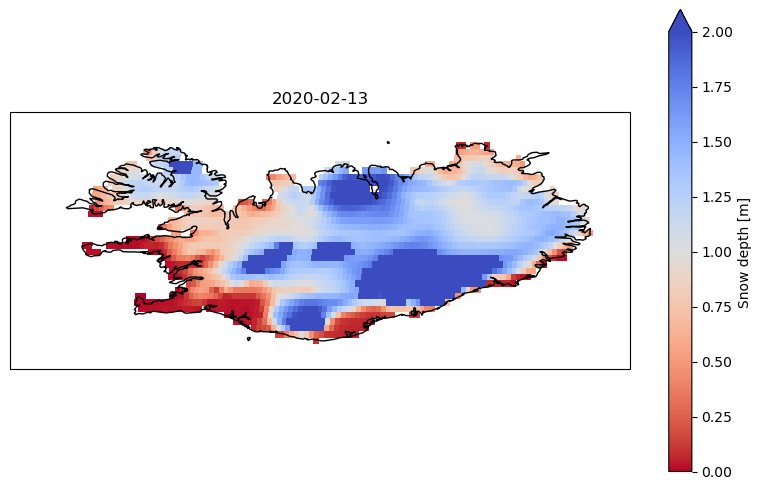

In [63]:
#to display a single plot
fig = plt.figure(figsize=(10, 10))
ax = plt.axes(projection=ccrs.Robinson())

ax.add_feature(cartopy.feature.BORDERS, linestyle='-', alpha=1)
ax.coastlines(resolution="10m")

# nr = 10
plot = ds.sde.plot(cmap=plt.cm.coolwarm_r, transform=ccrs.PlateCarree(), cbar_kwargs={"shrink": 0.6},vmin=0, vmax=2)
date_str = np.datetime_as_string(ds.sde[nr].time.values, unit='D')  # Format as date

plt.title(f"{date_str}");


In [ ]:
## to display multiple plots. 
# Calculate the number of items and rows/cols
num_items = len(ds.sde)
# Determine the number of columns and rows based on the number of items
num_cols = 2  # Set the desired number of columns
num_rows = (num_items + num_cols - 1) // num_cols

# Calculate the figsize dynamically based on the number of rows and columns
fig_width = 15  # Set a base width
fig_height = 100  # Calculate the height based on aspect ratio

# Create a figure without any cartopy elements for the entire plot
fig, axs = plt.subplots(nrows=num_rows, ncols=num_cols, figsize=(fig_width, fig_height), subplot_kw={'projection': ccrs.Robinson()})

for i, ax in enumerate(axs.flat):
    if i < num_items:
        ax.add_feature(cfeature.BORDERS, linestyle='-', alpha=1)
        date_str = np.datetime_as_string(ds.sde[i].time.values, unit='D')  # Format as date
        ds.sde[i].plot(ax=ax, cmap=plt.cm.coolwarm_r, vmin=0, vmax=0.5, cbar_kwargs={"shrink": 0.2})
        ax.set_title(f"{date_str}")
    else:
        ax.axis('off')

plt.tight_layout()
plt.show()

#### Test project with SMHI data aswell

In [ ]:
#plot for the test thing i'm doing

#plot time series for a given location
ds.sel(latitude=66.4311, longitude=20.6022, method='nearest').to_array().plot.line(x='time');
	

In [88]:
#count number of values in the array
#export to csv
#create new dataset with only time and sde  values  and export to csv
ds_new_drop = ds_new.drop(['latitude', 'longitude',  'valid_time', 'step', 'surface'])
ds_new_drop
ds_new_drop = ds_new_drop.to_dataframe()
ds_new_drop.to_csv(r'C:\Users\trygg\Documents\Master_project\Testing\SMHI_VS_ERA5\Data\ERA5\ERA5_values2021Winter_Ytterissjo.csv')

#### Other stuff down here

In [ ]:
#mask the data 
mask = ds > 3

# Use the mask to set values over 3 to NaN (Not a Number)
ds_mask = ds.where(~mask, other=float('nan'))

#plot time series for a given location
ds_mask.sel(latitude=60.3293, longitude=12.50686, method='nearest').to_array().plot.line(x='time');

In [4]:
grib_file_path_christmas =r"C:\Users\trygg\Documents\Master_project\Data\ERA5\Temp\snow_depth22_10-12_alldays.grib"
# grib_file_path_newyear = r"C:\Users\trygg\Documents\Master_project\Data\ERA5\Temp\snow_depth23_01-04_alldays.grib"

ds_c = xr.load_dataset(grib_file_path_christmas, engine="cfgrib")
# ds_n = xr.load_dataset(grib_file_path_newyear, engine="cfgrib")

NameError: name 'ds_c' is not defined

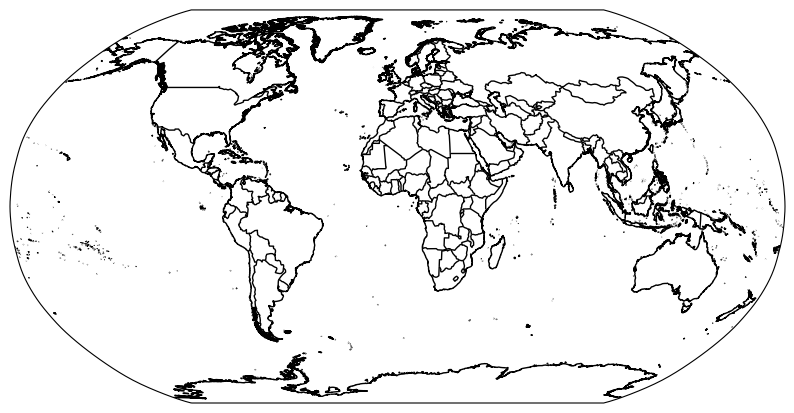

In [13]:
fig = plt.figure(figsize=(10, 10))
ax = plt.axes(projection=ccrs.Robinson())

ax.add_feature(cartopy.feature.BORDERS, linestyle='-', alpha=1)
ax.coastlines(resolution="10m")

plot = ds_c.sde[24].plot(cmap=plt.cm.coolwarm_r, transform=ccrs.PlateCarree(), cbar_kwargs={"shrink": 0.6},vmin=0, vmax=0.01)
plt.title("ERA5 - 2m temperature British Isles March 2019");


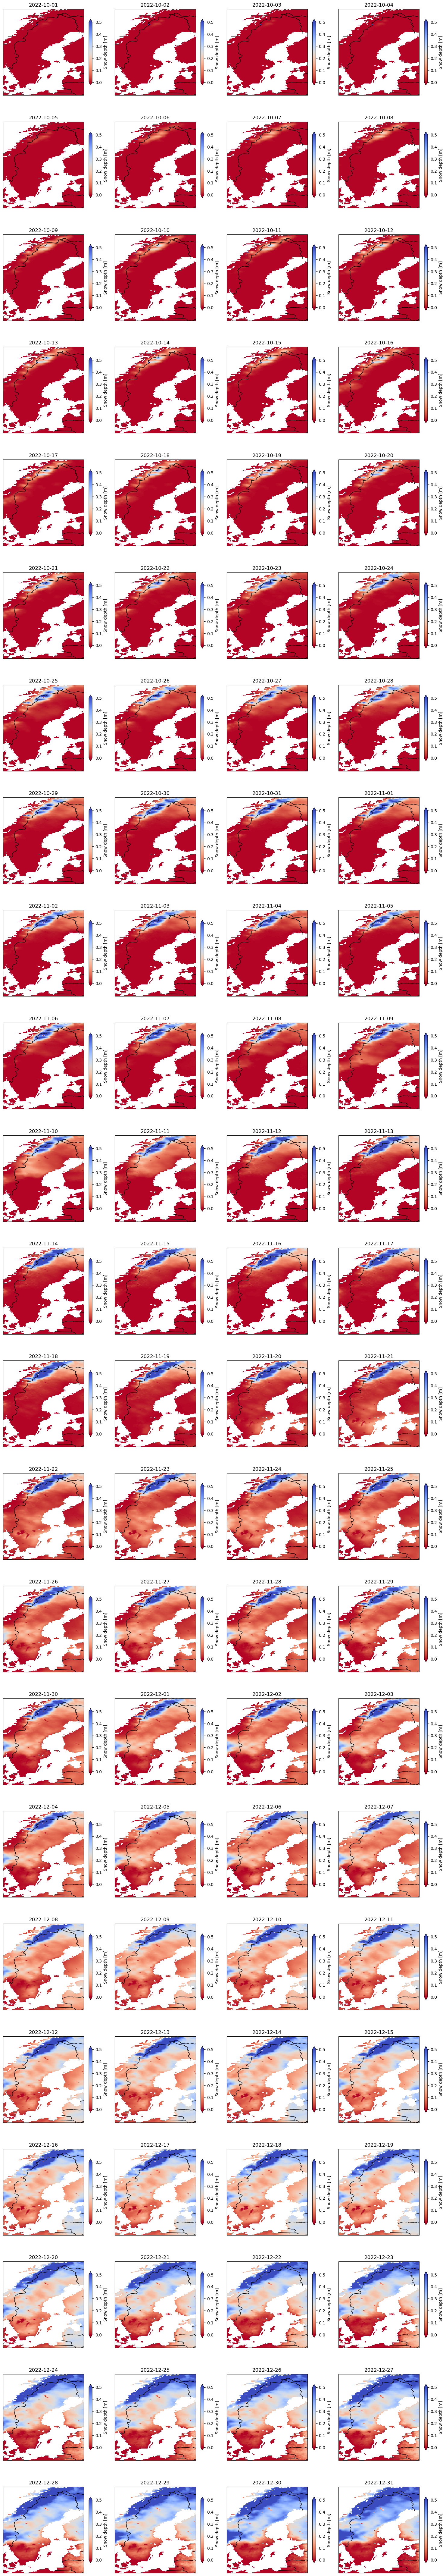

In [7]:
# Calculate the number of items and rows/cols
num_items = len(ds_c.sde)

# Determine the number of columns and rows based on the number of items
num_cols = 4  # Set the desired number of columns
num_rows = (num_items + num_cols - 1) // num_cols

# Calculate the figsize dynamically based on the number of rows and columns
fig_width = 15  # Set a base width
fig_height = fig_width * num_rows / num_cols  # Calculate the height based on aspect ratio

# Create a figure without any cartopy elements for the entire plot
fig, axs = plt.subplots(nrows=num_rows, ncols=num_cols, figsize=(fig_width, fig_height), subplot_kw={'projection': ccrs.PlateCarree()})


# Plot the data and add borders to each subplot
for i, ax in enumerate(axs.flat):
    if i < num_items:
        ax.add_feature(cfeature.BORDERS, linestyle='-', alpha=1)
        date_str = np.datetime_as_string(ds_c.sde[i].time.values, unit='D')  # Format as date
        ds_c.sde[i].plot(ax=ax, cmap=plt.cm.coolwarm_r, vmin=0, vmax=0.5, cbar_kwargs={"shrink": 0.6})
        ax.set_title(f"{date_str}")
    else:
        ax.axis('off')

plt.tight_layout()
plt.show()